In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv(r"C:\\Users\\Noor Ahmed\\OneDrive\\Desktop\\projecr\titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [55]:
from sklearn.preprocessing import LabelEncoder
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
lb=LabelEncoder()
df["PassengerId"]=lb.fit_transform(df["PassengerId"])
df["Survived"]=lb.fit_transform(df["Survived"])
df["Pclass"]=lb.fit_transform(df["Pclass"])
df["Name"]=lb.fit_transform(df["Name"])
df["Sex"]=lb.fit_transform(df["Sex"])
df["Age"]=lb.fit_transform(df["Age"])
df["SibSp"]=lb.fit_transform(df["SibSp"])
df["Parch"]=lb.fit_transform(df["Parch"])
df["Ticket"]=lb.fit_transform(df["Ticket"])
df["Fare"]=lb.fit_transform(df["Fare"])
df["Cabin"]=lb.fit_transform(df["Cabin"])
df["Embarked"]=lb.fit_transform(df["Embarked"])


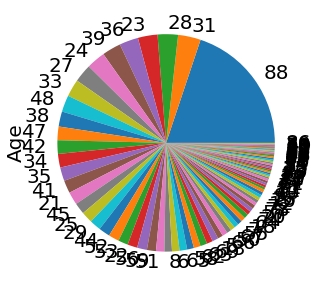

In [60]:
s= df['Age'].value_counts().plot(kind='pie', figsize=(5,5))

In [62]:
x=df.drop("Age",axis=1)
y=df["Age"]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(891, 11)
(891,)


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 11)
(712,)
(179, 11)
(179,)


# BUILD THE MODEL

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
def mscore(model):
    print("training score",model.score(x_train,y_train))
    print("testing score",model.score(x_test,y_test))
def gen_metrics(y_test,ypred):
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mse)
    print(mae)
    print(mse)
    print(rmse)
def gen_matrix(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    print(accuracy_score(y_test,ypred))


# 1)DECISION TREE CLASSIFIER MODEL

In [68]:
m1=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=20)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20)

In [69]:
print(m1.score(x_train,y_train))

0.21629213483146068


In [70]:
print(m1.score(x_test,y_test))

0.16759776536312848


In [71]:
ypred_m1=m1.predict(x_test)

In [72]:
print(ypred_m1)

[29 88 29  6 88  5 38 88 88  5 88  6 88  6 88 88 38  6  8 88  6 88 88 88
 29  6 88 88 88 24 24 88 88  6 88 88 88 29 31 88 88 88 88 88 88 88 29 88
  6  6 88 88 88  5 41 88  8  6  6 88 88 88 88 29 88  8 88 38 88 88  6 88
 88 88  6 38 88 88 88 88 31  8  5 88 88 88 88 24 88 88 88 88 88 41 88 29
  6 88 88 88  8 88 88 31  6 88 24 41 88 29 88  5 88 88 41 88 88 88 88 29
 88 88 88 31 38 88 38 88 88 88 88 88  6 88 29 88 88 88 88 88 88 38 88  6
  8 88 88 88 88 88 38 88 88 29 88 88 88 88 88 88 88 88 88 38 88 88  8 29
 88 88  5 88 88 29 88 88 88  6  8]


In [73]:
gen_metrics(y_test,ypred_m1)

32.66480446927374
1724.608938547486
41.52841122108437


In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [75]:
cm=confusion_matrix(ypred_m1,y_test)
print(cm)
print(classification_report(ypred_m1,y_test))
print(accuracy_score(ypred_m1,y_test))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  2]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  1 28]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         6
           6       0.33      0.06      0.10        18
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00

C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.tree import plot_tree

# 2)LOGISTIC REGRESSION MODEL

In [30]:
m2=LogisticRegression(max_iter=1000)

In [31]:
m2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
mscore(m2)

training score 0.6658506731946144
testing score 0.684596577017115


In [33]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [34]:
gen_metrics(ypred_m2,y_test)

0.3154034229828851
0.3154034229828851
0.5616078907769059


In [35]:
gen_matrix(ypred_m2,y_test)

[[  0   0]
 [129 280]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.68      0.81       409

    accuracy                           0.68       409
   macro avg       0.50      0.34      0.41       409
weighted avg       1.00      0.68      0.81       409

0.684596577017115


C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3)KNN CLASSIFIER

In [78]:
m3=KNeighborsClassifier(n_neighbors=125)

In [79]:
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=125)

In [80]:
mscore(m3)

training score 0.19662921348314608
testing score 0.20670391061452514


In [81]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88]


In [82]:
gen_metrics(ypred_m3,y_test)

39.35195530726257
2257.9441340782123
47.51782964402112


In [83]:
gen_matrix(ypred_m3,y_test)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  1  2 ...  1  1 37]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00

C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4)SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import SVC
m4=SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

In [ ]:
mscore(m4)

In [ ]:
ypred_m4=m4.predict(x_test)

In [ ]:
print(ypred_m4)

In [ ]:
gen_metrics(ypred_m4,y_test)

In [ ]:
gen_matrix(ypred_m4,y_test)

# 5)RANDOM FOREST CLASSIFIER

In [48]:
m5=RandomForestClassifier()
m5.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
mscore(m5)

training score 0.9999616093366094
testing score 0.8578228159066482


In [41]:
ypred_m5=m5.predict(x_test)

In [42]:
print(ypred_m5)

[1 0 0 ... 0 0 0]


In [43]:
gen_metrics(ypred_m5,y_test)

0.14217718409335176
0.14217718409335176
0.37706389921782724


In [44]:
gen_matrix(ypred_m5,y_test)

[[4635  577]
 [ 349  952]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5212
           1       0.62      0.73      0.67      1301

    accuracy                           0.86      6513
   macro avg       0.78      0.81      0.79      6513
weighted avg       0.87      0.86      0.86      6513

0.8578228159066482


THE ACCURACY SCORES ARE:
    DECISION TREE CLASSIFIER:0.841087056655919
    LOGISTIC REGRESSION:0.7851988331030247
    KNN CLASSIFIER:0.7805926608321818
    RANDON FOREST CLASSIFIER:0.8621219100261016
        
    